 # Corrimiento al rojo en un anillo

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [2]:
# Función con lo que se obtiene una distribución uniforme de un anillo

# Input values: r es el radio mayor, r1 el radio menor, N numero de puntos
def anillo(r,r1,N):
    anillo = []
    i=0
    dim=2
    # Ciclo que obtiene N puntos dentro de un circulo o esfera
    while i<N:
        point = np.random.random(dim)*2*r-r # Se crea el punto
        r_test = (point**2).sum(axis=0)**.5 
        # Se guarda el punto si el punto esta dentro de el circulo
        if (r_test <= r and r_test >= r1 ):
            anillo.append(point)
            i+=1
    anillo = np.array(anillo)
    anillo = anillo.T
    return anillo # Regresa los punos dentro del circulo

In [21]:
# Obtener los puntos dentro del anillo
# ND es el numero de datos en este caso 1000, r y r1 radios mayor y menor, L la vecindad
r,r1,L,ND = 5,3,20,1000

# Generando datos del anillo
D = anillo(r,r1,ND)

In [4]:
# Definición para obtener el anillo deformado por las velocidades que dependen de la 
# distancia minima (x,y)--> (x,y+d_min*f_scale)
def corrimiento(D,f_scale):
    # Haciendo una copia de los datos donde guardaremos los datos corridos de D.
    D_shift = D.copy()
    # En este for encontraremos la distancia mínima para cada punto en D.
    for i in range(np.shape(D)[1]): # número de datos de D
        d_min = np.infty # d_vel es la variable donde guardaremos la distancia minima
        for j in range(np.shape(D)[1]): # número de datos de D
            if i!=j: # Para no obtener distancias igual a cero
                # Calculando la distancia entre el punto i e j
                d_test=np.sqrt((D[0][i] - D[0][j])**2 + (D[1][i]-D[1][j])**2)
                # Condicion de que la distancia sea menor que una vecidad L/10
                if (d_test < L/10 and d_min > d_test):
                    # Actualiza el valor minimo de distancia 
                    d_min = d_test
                    # Modifcamos la posicion en 'y' para el punto i
                    D_shift[1][i] = D[1][i] + d_min*f_scale
    return D_shift

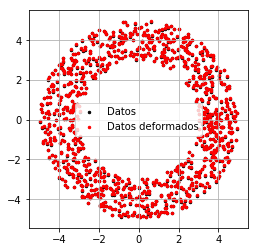

In [16]:
# Para graficar btenemos los valores x & y para los arreglos D y D_shift 
x,y = D
xc,yc = corrimiento(D,0.1) # El corrimiento en y será como dmin*0.1

# Graficando el anillo original y el deformado
plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x,y,c='k',s=6,label='Datos') # Los puntos negros son el anillo original
ax.scatter(xc,yc,color='r',s=6, label ='Datos deformados') # Los puntos rojos son el anillo deformado
ax.grid()
plt.legend()
plt.show()

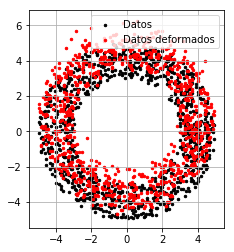

In [17]:
# Cambiando el factor de corrimiento de y a 10

# Para graficar btenemos los valores x & y para los arreglos D y D_shift 
x,y = D
xc,yc = corrimiento(D,5.) # El corrimiento en y será como dmin*10

# Graficando el anillo original y el deformado
plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x,y,color='k',s=6,label='Datos') # Los puntos negros son el anillo original
ax.scatter(xc,yc,color='r',s=6,label='Datos deformados') # Los puntos rojos son el anillo deformado
ax.grid()
plt.legend()
plt.show()